In [1]:
import opticalFlowUtilities as util

In [4]:
filename = "../f1-work/example_data/Shot_Spain_C8.mp4"
filename = "../f1-work/example_data/f1_blur_2.mp4"
cleanup = False
hist_eq0 = True

if hist_eq0:
    output_path0 = 'results_MR_f1_blur'
else:
    output_path0 = 'results_MR_f1_blur'

In [5]:
opt_flow = util.generateOpticalFlowResults(filename, output_path = output_path0, hist_eq = hist_eq0, end_frame=None)

max_frame: 218


In [6]:
# generate the optical flow files
opt_flow.runOpticalFlow()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217/217 [00:26<00:00,  8.08it/s]


In [9]:
# generate a video file showing optical flow overlay
opt_flow.generateOpticalFlowVideo()

216 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217/217 [00:14<00:00, 14.50it/s]


In [8]:
import numpy as np
A = np.load('results_MR_f1_blur/np_flow_s1_30.npy')
A.shape

(1080, 1920, 2)

(0.36586276, 0.0022939304)

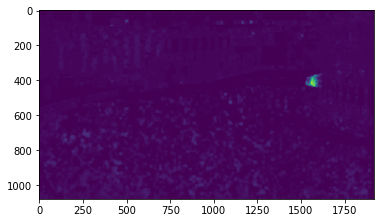

In [9]:
import matplotlib.pyplot as plt
plt.imshow(np.sqrt(A[:,:,0]**2+A[:,:,1]**2))
np.median(A[:,:,0]), np.median(A[:,:,1])

In [10]:
opt_flow.fuseVideoFiles(prefix='out0_')
opt_flow.fuseVideoFiles(prefix='vid0_')

Moviepy - Building video results_MR_f1_blur/out0_fused.mp4.
Moviepy - Writing video results_MR_f1_blur/out0_fused.mp4



Moviepy - Done !
Moviepy - video ready results_MR_f1_blur/out0_fused.mp4
Moviepy - Building video results_MR_f1_blur/vid0_fused.mp4.
Moviepy - Writing video results_MR_f1_blur/vid0_fused.mp4



Moviepy - Done !
Moviepy - video ready results_MR_f1_blur/vid0_fused.mp4


In [7]:
approach = 3
opt_flow.computeMagnitudes(approach)

 28%|██████████████████████████▍                                                                  | 1588/5582 [00:31<01:18, 51.17it/s]


KeyboardInterrupt: 

In [ ]:
transition_frames = opt_flow.thresholdMagnitudes()

In [ ]:
opt_flow.writeTransitionFrames()

In [ ]:
opt_flow.createTransitionVideos()

In [11]:
opt_flow.fuseVideoFiles(prefix='vid_t'+str(approach)+'_')

t:   0%|▏                                                              | 16/5359 [00:00<00:33, 159.67it/s, now=None]

Moviepy - Building video results_MR_hist_eq/vid_t3_fused.mp4.
Moviepy - Writing video results_MR_hist_eq/vid_t3_fused.mp4



Moviepy - Done !
Moviepy - video ready results_MR_hist_eq/vid_t3_fused.mp4


In [12]:
# perform cleanup of intermediate files
if cleanup:
    opt_flow.cleanupFiles(prefix='out0_')
    opt_flow.cleanupFiles(prefix='vid0_')
    opt_flow.cleanupFiles(prefix='vid_t'+str(approach)+'_')
    opt_flow.cleanupFiles(prefix='frame_',suffix='png')
    opt_flow.cleanupFiles(prefix='optical_flow_',suffix='png')
    opt_flow.cleanupFiles(prefix='np_flow',suffix='npy')

In [4]:
import fitCNNUtilities as cnn_utils

cnn_obj = cnn_utils.analysisWithCNN(output_path0, hist_eq0 )

# Uncomment to display the training data
cnn_obj.showTrainingData(max_show=0)

In [5]:
cnn_obj.trainCNN(val_percent = 0.2, lrate = 1e-3, n_epochs = 10000)

  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 15.65it/s]

Epoch :  1 	 train_loss : 0.3486900385469198 	 val_loss : 0.12453024627433883 	 opt_val_loss : 0.12453024627433883 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.83it/s]

Epoch :  2 	 train_loss : 0.26930675140788984 	 val_loss : 0.12532597339142942 	 opt_val_loss : 0.12453024627433883 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.45it/s]

Epoch :  3 	 train_loss : 0.22454649515243041 	 val_loss : 0.11168165392397593 	 opt_val_loss : 0.11168165392397593 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.70it/s]

Epoch :  4 	 train_loss : 0.1909956484256933 	 val_loss : 0.10960650608952467 	 opt_val_loss : 0.10960650608952467 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.92it/s]

Epoch :  5 	 train_loss : 0.1565432908375644 	 val_loss : 0.12705071552449632 	 opt_val_loss : 0.10960650608952467 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.91it/s]

Epoch :  6 	 train_loss : 0.12299298255756083 	 val_loss : 0.10893462867291721 	 opt_val_loss : 0.10893462867291721 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.63it/s]

Epoch :  7 	 train_loss : 0.09299824378750701 	 val_loss : 0.1070625099115811 	 opt_val_loss : 0.1070625099115811 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.07it/s]

Epoch :  8 	 train_loss : 0.0620178880635649 	 val_loss : 0.10250046774897076 	 opt_val_loss : 0.10250046774897076 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.30it/s]

Epoch :  9 	 train_loss : 0.04132679020646416 	 val_loss : 0.09189169732704588 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.56it/s]

Epoch :  10 	 train_loss : 0.038644943972637215 	 val_loss : 0.1928968759416233 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 19.14it/s]

Epoch :  11 	 train_loss : 0.02520301531736398 	 val_loss : 0.1782522189957151 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 19.12it/s]

Epoch :  12 	 train_loss : 0.01858460823469146 	 val_loss : 0.21471339511617693 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.92it/s]

Epoch :  13 	 train_loss : 0.03496495768261222 	 val_loss : 0.37567061649911593 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.94it/s]

Epoch :  14 	 train_loss : 0.00504085178629099 	 val_loss : 0.10531636755164679 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.54it/s]

Epoch :  15 	 train_loss : 0.007832342294379421 	 val_loss : 0.3728647595025652 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.41it/s]

Epoch :  16 	 train_loss : 0.013003279071244211 	 val_loss : 0.338813937286509 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.57it/s]

Epoch :  17 	 train_loss : 0.003632449955783922 	 val_loss : 0.42575990044642686 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.90it/s]

Epoch :  18 	 train_loss : 0.0017549375657532648 	 val_loss : 0.6228025654126491 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.29it/s]

Epoch :  19 	 train_loss : 0.05006890217456908 	 val_loss : 0.26512727220587196 	 opt_val_loss : 0.09189169732704588 	 lrate : 0.001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.63it/s]

Epoch :  20 	 train_loss : 0.019686380100362538 	 val_loss : 0.05182238401881042 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.97it/s]

Epoch :  21 	 train_loss : 0.012180297146086459 	 val_loss : 0.05344540626996203 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.60it/s]

Epoch :  22 	 train_loss : 0.01028787483968093 	 val_loss : 0.0561602327448855 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.66it/s]

Epoch :  23 	 train_loss : 0.009235443719262548 	 val_loss : 0.05813274750596441 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.68it/s]

Epoch :  24 	 train_loss : 0.00879549947942198 	 val_loss : 0.05991277441649364 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.96it/s]

Epoch :  25 	 train_loss : 0.008379094189876923 	 val_loss : 0.060833722942799144 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.73it/s]

Epoch :  26 	 train_loss : 0.007787573651550399 	 val_loss : 0.06379679437332363 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.60it/s]

Epoch :  27 	 train_loss : 0.00729605496729846 	 val_loss : 0.0647099893436754 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.50it/s]

Epoch :  28 	 train_loss : 0.00697167452621746 	 val_loss : 0.06631730356063376 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.91it/s]

Epoch :  29 	 train_loss : 0.006552656483225721 	 val_loss : 0.06663585882221233 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.06it/s]

Epoch :  30 	 train_loss : 0.00609590643282666 	 val_loss : 0.06620144066235983 	 opt_val_loss : 0.05182238401881042 	 lrate : 0.0001


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.76it/s]

Epoch :  31 	 train_loss : 0.00944401455277936 	 val_loss : 0.04971668780697848 	 opt_val_loss : 0.04971668780697848 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.68it/s]

Epoch :  32 	 train_loss : 0.009184795101140885 	 val_loss : 0.0482229108626334 	 opt_val_loss : 0.0482229108626334 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.78it/s]

Epoch :  33 	 train_loss : 0.009020810484192529 	 val_loss : 0.047094635312363034 	 opt_val_loss : 0.047094635312363034 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.02it/s]

Epoch :  34 	 train_loss : 0.008906138004022068 	 val_loss : 0.04621171510074776 	 opt_val_loss : 0.04621171510074776 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.14it/s]

Epoch :  35 	 train_loss : 0.00881733303433268 	 val_loss : 0.045386270587521774 	 opt_val_loss : 0.045386270587521774 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.30it/s]

Epoch :  36 	 train_loss : 0.008744295381297383 	 val_loss : 0.044762011317710834 	 opt_val_loss : 0.044762011317710834 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.20it/s]

Epoch :  37 	 train_loss : 0.008681288139693303 	 val_loss : 0.04426712936920336 	 opt_val_loss : 0.04426712936920336 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.64it/s]

Epoch :  38 	 train_loss : 0.008622786440052247 	 val_loss : 0.043806609433417125 	 opt_val_loss : 0.043806609433417125 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.19it/s]

Epoch :  39 	 train_loss : 0.008563844139037732 	 val_loss : 0.04336402985119944 	 opt_val_loss : 0.04336402985119944 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.41it/s]

Epoch :  40 	 train_loss : 0.008506884246243216 	 val_loss : 0.04299956320078616 	 opt_val_loss : 0.04299956320078616 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 17.73it/s]

Epoch :  41 	 train_loss : 0.008458392538866773 	 val_loss : 0.04278246105404114 	 opt_val_loss : 0.04278246105404114 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 19.01it/s]

Epoch :  42 	 train_loss : 0.008414996539512585 	 val_loss : 0.04271942035414808 	 opt_val_loss : 0.04271942035414808 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.23it/s]

Epoch :  43 	 train_loss : 0.0083749217905683 	 val_loss : 0.042678423486159765 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.38it/s]

Epoch :  44 	 train_loss : 0.008333438841166045 	 val_loss : 0.04269917197848293 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.30it/s]

Epoch :  45 	 train_loss : 0.008291373562769877 	 val_loss : 0.04275968772500565 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.28it/s]

Epoch :  46 	 train_loss : 0.008248986822107125 	 val_loss : 0.04285036876462082 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.42it/s]

Epoch :  47 	 train_loss : 0.008209051945009883 	 val_loss : 0.04290725435234558 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.14it/s]

Epoch :  48 	 train_loss : 0.008159720033341323 	 val_loss : 0.04313656288349518 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.03it/s]

Epoch :  49 	 train_loss : 0.008110643703073746 	 val_loss : 0.043321322800515816 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:01, 18.60it/s]

Epoch :  50 	 train_loss : 0.00806879034573487 	 val_loss : 0.04356766218150435 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.69it/s]

Epoch :  51 	 train_loss : 0.00803116957351651 	 val_loss : 0.04370147046152084 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


  6%|█████▍                                                                                            | 2/36 [00:00<00:02, 16.87it/s]

Epoch :  52 	 train_loss : 0.007994533670979662 	 val_loss : 0.043858242453833185 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 50.46it/s]

Epoch :  53 	 train_loss : 0.007966849736779599 	 val_loss : 0.043924174284791756 	 opt_val_loss : 0.042678423486159765 	 lrate : 1e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 54.41it/s]


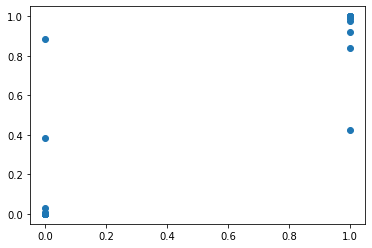

In [7]:
cnn_obj.computeValPredictions()

In [1]:
cnn_obj.displayValTransitions(thold=0.1)

NameError: name 'cnn_obj' is not defined

In [9]:
cnn_obj.showConfusionMatrix(thold=0.1)

[[72  2]
 [ 0 16]]


In [3]:
######################################################
## Apply now to unseen test data #####################
######################################################

import opticalFlowUtilities as util
import fitCNNUtilities as cnn_utils


In [4]:
# generate OF data for a new test video

filename_test = "/ml_data_fuse/lower_res/square/The_Cook_Up_S01E36_ryffcopy_474_474.mp4"
output_path0_test = 'results_MR_hist_eq_test_vid_sq'

filename_test = "/ml_data_fuse/cookup/The_Cook_Up_S01E36_ryffcopy.mp4" 
output_path0_test = 'results_MR_hist_eq_test_vid_orig'

filename_test = "4657828609.mp4"
output_path0_test = 'results_China3'

filename_test = "2163923509.mp4"
output_path0_test = 'results_China'

filename_test = "transition_vid_fused_200.mp4"
output_path0_test = 'results_trans_200_rgb'

filename_test = "4657828609.mp4"
output_path0_test = 'results_China3_rgb'

filename_test = "/ml_data_fuse/cookup/The_Cook_Up_S01E36_ryffcopy.mp4" 
output_path0_test = 'results_MR_hist_eq_test_vid_orig_rgb'

filename_test = "../exampleVideos/wpt_test.mp4" 
output_path0_test = 'results_end_to_end5'

end_frame = 5000
hist_eq0 = True

if hist_eq0:
    output_path0 = 'results_MR_hist_eq'
else:
    output_path0 = 'results_MR'

In [5]:
opt_flow_test = util.generateOpticalFlowResults(filename_test, output_path = output_path0_test, hist_eq = hist_eq0, end_frame=end_frame)
cnn_obj = cnn_utils.analysisWithCNN(output_path0, hist_eq0)

In [6]:
# generate the optical flow files
opt_flow_test.runOpticalFlow()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:39<00:00, 127.74it/s]


In [7]:
cnn_obj.runModelOnTestData(filename_test, output_path0_test,end_frame=end_frame)

In [8]:
opt_flow_test.generateFrames() # generate the non-histogram enhanced frames

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 34793.35it/s]


In [11]:
cnn_obj.createVideosWithTransitions(filename_test, INTERVAL = 300, approach = 3, trans_thold=0.2, preview=False, workers=4)

100%|██████████| 300/300 [00:26<00:00, 11.43it/s]

In [12]:
cnn_obj.combineVideos()

t:   0%|                                                                                   | 4/4800 [00:00<02:12, 36.07it/s, now=None]

Moviepy - Building video results_end_to_end5/vid_t3_fused.mp4.
Moviepy - Writing video results_end_to_end5/vid_t3_fused.mp4



Moviepy - Done !
Moviepy - video ready results_end_to_end5/vid_t3_fused.mp4
